<a href="https://colab.research.google.com/github/Mbacanudo/Diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datos Personales

* **Nombre**: Mario Eduardo Navarro Montero
* **DataSet**: Diabetes

###Objetivos:

- Basándonos en las características y utilizando modelos de aprendizaje automático (ML), determinaremos si es posible predecir si un paciente podría desarrollar diabetes.

###Diccionario de datos:


| Nombre columna           | Tipo de dato | Descripción                                  |
|--------------------------|--------------|----------------------------------------------|
| Outcome                  | Int          | Diabetes (0 = no, 1 = sí) (objetivo)         |
| Pregnancies              | Int          | Número de embarazos                          |
| Glucose                  | Int          | Concentración de glucosa en plasma           |
| BloodPressure            | Int          | Presión arterial diastólica (mm Hg)          |
| SkinThickness            | Int          | Espesor del pliegue cutáneo del tríceps (mm) |
| Insulin                  | Int          | Insulina sérica de 2 horas (muU/ml)          |
| BMI                      | Flotante     | Índice de masa corporal                      |
| DiabetesPedigreeFunction | Flotante     | Función pedigree Diabetes                    |
| Age                      | Int          | Edad                                         |

## Solución

In [ ]:
# Librerías

import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error, roc_auc_score, RocCurveDisplay, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

### I.- Manipulación de datos y Visualizaciones


In [ ]:
# Cargamos el conjunto de datos y realizamos una vista gral a los datos cargados
file = "/content/diabetes.csv"
df = pd.read_csv(file)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Revisamos el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Vista general del Dataset

In [ ]:
print("------------------------------------------------------\n")
print(f"Número de columnas: {df.shape[1]}\n")
print(f"Número de filas: {df.shape[0]}\n")
print(f"Número de elementos duplicados: {df.duplicated().sum()}\n")
print(f"Número de valores nulos: {df.isna().sum().sum()}\n")
print("------------------------------------------------------")

------------------------------------------------------

Número de columnas: 9

Número de filas: 768

Número de elementos duplicados: 0

Número de valores nulos: 0

------------------------------------------------------


In [ ]:
print("------------------------------------------------------\n")
print(f"Columna objetivo: Outcome \n")
print(f"Columnas númericas: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age\n")
print("------------------------------------------------------")

------------------------------------------------------

Columna objetivo: Outcome 

Columnas númericas: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

------------------------------------------------------


In [ ]:
print("------------------------------------------------------\n")
print(f"Total de pacientes sin diabetes :", df[df["Outcome"]==0].shape[0])
print(f"Total de pacientes con diabetes:", df[df["Outcome"]==1].shape[0], "\n")
print("------------------------------------------------------")

------------------------------------------------------

Total de pacientes sin diabetes : 500
Total de pacientes con diabetes: 268 

------------------------------------------------------


In [ ]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

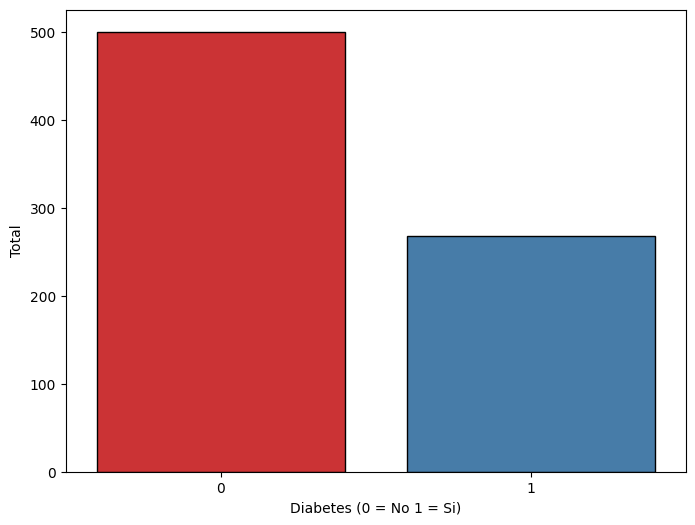

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=df, palette = "Set1", edgecolor = "black");
plt.ylabel("Total")
plt.xlabel("Diabetes (0 = No 1 = Si)")
plt.show()

**Conclusiones Intermedias**:
- El conjunto de datos presenta valores numericos para todas las columnas
- El conjunto de datos no presenta valores nulos
- El conjunto de datos no presenta valores duplicados
- El conjunto de datos presenta desbalance entre las clases (0 y 1)


In [ ]:
# Revisamos la correlacion entre caracteristicas del DataFrame
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Revisamos las estadisticas del Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("------------------------------------------------------\n")
print("Original:")
print(f"Total de 0 en Glucosa:", df[df["Glucose"]==0].shape[0])
print(f"Total de 0 en BloodPressure:", df[df["BloodPressure"]==0].shape[0])
print(f"Total de 0 en SkinThickness:", df[df["SkinThickness"]==0].shape[0])
print(f"Total de 0 en Insulin:", df[df["Insulin"]==0].shape[0])
print(f"Total de 0 en BMI:", df[df["BMI"]==0].shape[0], "\n")
print("------------------------------------------------------")

------------------------------------------------------

Original:
Total de 0 en Glucosa: 5
Total de 0 en BloodPressure: 35
Total de 0 en SkinThickness: 227
Total de 0 en Insulin: 374
Total de 0 en BMI: 11 

------------------------------------------------------


In [ ]:
df["Glucose"] = df["Glucose"].replace(0, df['Glucose'].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df['BloodPressure'].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df['SkinThickness'].mean())
df["Insulin"] = df["Insulin"].replace(0, df['Insulin'].mean())
df["BMI"] = df["BMI"].replace(0, df['BMI'].mean())

In [ ]:
print("------------------------------------------------------\n")
print("Actualizado:")
print(f"Total de valores 0 en Glucosa:", df[df["Glucose"]==0].shape[0])
print(f"Total de valores 0 en BloodPressure:", df[df["BloodPressure"]==0].shape[0])
print(f"Total de valores 0 en SkinThickness:", df[df["SkinThickness"]==0].shape[0])
print(f"Total de valores 0 en Insulin:", df[df["Insulin"]==0].shape[0])
print(f"Total de valores 0 en BMI:", df[df["BMI"]==0].shape[0], "\n")
print("------------------------------------------------------")

------------------------------------------------------

Actualizado:
Total de valores 0 en Glucosa: 0
Total de valores 0 en BloodPressure: 0
Total de valores 0 en SkinThickness: 0
Total de valores 0 en Insulin: 0
Total de valores 0 en BMI: 0 

------------------------------------------------------


In [ ]:
# Revisamos nuevamente las estadisticas del Dataset con los cambios realizados
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
condicion = (df['Pregnancies'] == 14) | (df['Pregnancies'] == 15) | (df['Pregnancies'] == 17)

df.drop(df[condicion].index, inplace=True)

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: Pregnancies, dtype: int64

In [ ]:
df['Pregnancies'].value_counts(normalize=True)

1     0.176702
0     0.145288
2     0.134817
3     0.098168
4     0.089005
5     0.074607
6     0.065445
7     0.058901
8     0.049738
9     0.036649
10    0.031414
11    0.014398
13    0.013089
12    0.011780
Name: Pregnancies, dtype: float64

In [ ]:
#Chequeamos si estos cambios tuvieron algun efecto en la correlacion de caracteristicas
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118805,0.217935,0.002656,-0.019119,0.009581,-0.031852,0.546169,0.205240
Glucose,0.118805,1.000000,0.223159,0.157666,0.400000,0.230258,0.138230,0.265657,0.491994
BloodPressure,0.217935,0.223159,1.000000,0.135151,0.010018,0.281858,-0.000590,0.327691,0.164935
SkinThickness,0.002656,0.157666,0.135151,1.000000,0.241403,0.534628,0.154499,0.023669,0.172164
Insulin,-0.019119,0.400000,0.010018,0.241403,1.000000,0.189933,0.157839,0.038158,0.179892
BMI,0.009581,0.230258,0.281858,0.534628,0.189933,1.000000,0.153508,0.022268,0.309458
DiabetesPedigreeFunction,-0.031852,0.138230,-0.000590,0.154499,0.157839,0.153508,1.000000,0.033822,0.176598
Age,0.546169,0.265657,0.327691,0.023669,0.038158,0.022268,0.033822,1.000000,0.233776
Outcome,0.205240,0.491994,0.164935,0.172164,0.179892,0.309458,0.176598,0.233776,1.000000


**Conclusiones Intermedias**:
- La correlacion indica mayor relacion de Outcome con Glucose
- Varios niveles 0 en las columnas Glucose, BloodPressure, SkinThickness, Insulin y BMI los cuales estarian incorrectos.
- Estos se corrigieron con la media de cada columna.
- Una vez realizado el cambio de los valores 0 por las medias correspondientes de cada columna podemos ver que hubo un incremento en la relacion de cada caracteristica con la columna "Outcome"
- Al ser pocas las filas con embarazos entre 2 y 1, estas fueron eliminadas.

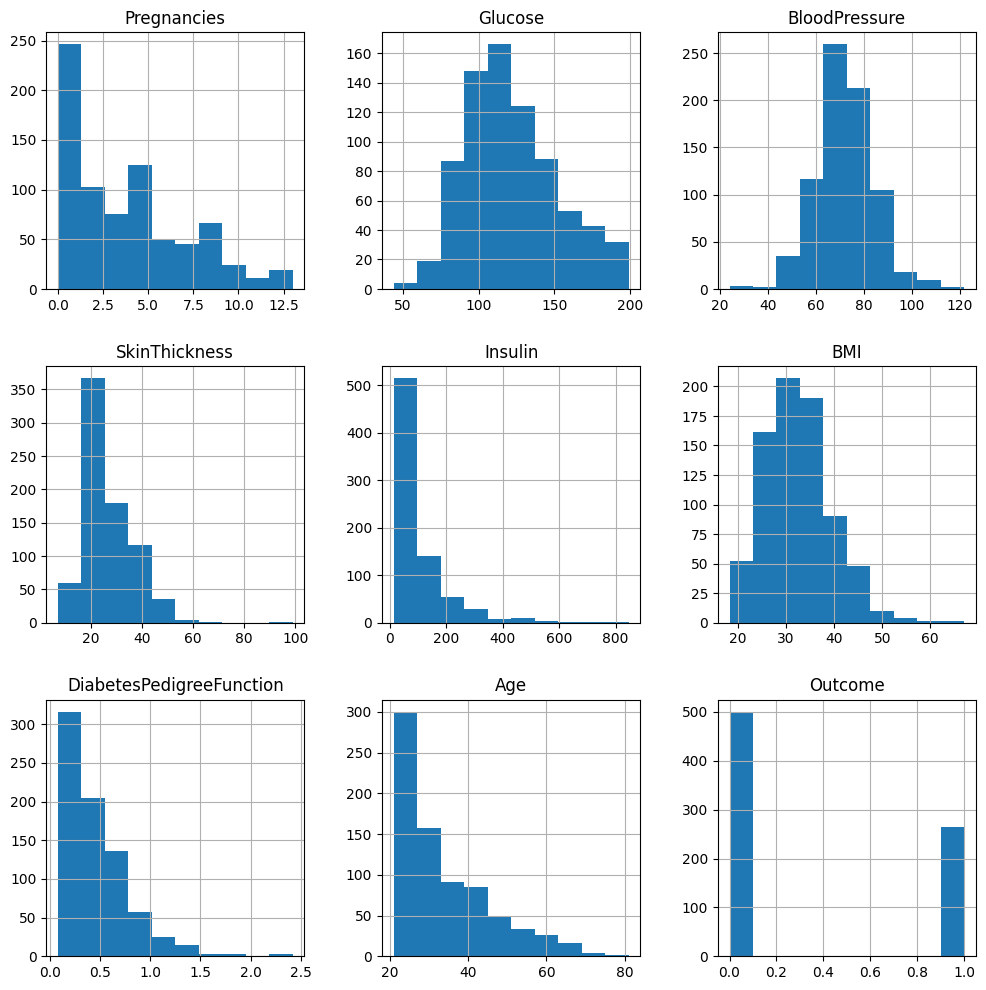

In [ ]:
# Histograma de frecuencias segun caracteristicas del Dataset
df.hist(bins=10,figsize=(12,12))
plt.show()

**Conclusiones Intermedias**:
- Podemos ver que la mayor frecuencia de embarazos se encuentra entre 0 y 5.
- La mayor frecuencia de glucosa se encuentra en los rangos de 100-130.
- La mayor frecuencia de presion sanguinea se encuentra entre 60-80.
- La mayor frecuencia de SkinThickness se encuentra en 20.
- La mayor frecuencia de Insulin se encuentra bajo los 100.
- La mayor frecuencia de BMI esta en los rangos de 25-35.
- La mayor frecuencia de DiabetesPedigreeFunction 0.1-0.3.
- La mayor frecuencia de Age es entre los rangos de 20 a 30 años.


### II.- Modelos

**Conclusiones Intermedias**:
- Para este caso usaremos modelos de clasificacion ya que solo tenemos 2 clases en la columna objetivo "Outcome", las cuales serian 0 = No y 1 = Si

Modelos de Clasificación a utilizar:
- RandomForest
- Arboles de decisión
- Regresión Logística
- KNN

De los cuales vamos a evaluar cada uno para ver cual es el que tiene mejor acertividad en la prediccion.

###Procesamiento de datos

In [ ]:
num_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'),
    ),
    ('scaler',StandardScaler()
    )
])
cat_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'),
    )
])

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_imputer,num_cols),
    ('cat',cat_imputer,cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor.fit(X_train)

X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)

preprocessor.fit(X)
X_procesada = preprocessor.transform(X)


In [ ]:
print("------------------------------------------------------\n")
print(f"Tamaño de conjunto de entrenamiento: N° columnas {X_train.shape[1]} // N° de filas: {X_train.shape[0]}\n")
#print(f"Tamaño de conjunto de validación: N° columnas {X_val.shape[1]} // N° de filas: {X_val.shape[0]}\n")
print(f"Tamaño de conjunto de prueba: N° columnas {X_test.shape[1]} // N° de filas: {X_test.shape[0]}\n")
print("------------------------------------------------------")

------------------------------------------------------

Tamaño de conjunto de entrenamiento: N° columnas 8 // N° de filas: 534

Tamaño de conjunto de prueba: N° columnas 8 // N° de filas: 230

------------------------------------------------------


**Conclusiones Intermedias**:
- Se lleva a cabo el preprocesamiento de los datos sin necesidad de utilizar ningún codificador adicional, dado que las características del conjunto de datos ya están representadas como valores numéricos.

##RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

In [ ]:
best_params = grid.best_params_
print(best_params)

{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}


In [ ]:
rf = RandomForestClassifier(**best_params)
rf.fit(X_train_processed,y_train)
y_pred = rf.predict(X_test_processed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       152
           1       0.63      0.62      0.62        78

    accuracy                           0.75       230
   macro avg       0.72      0.72      0.72       230
weighted avg       0.75      0.75      0.75       230



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


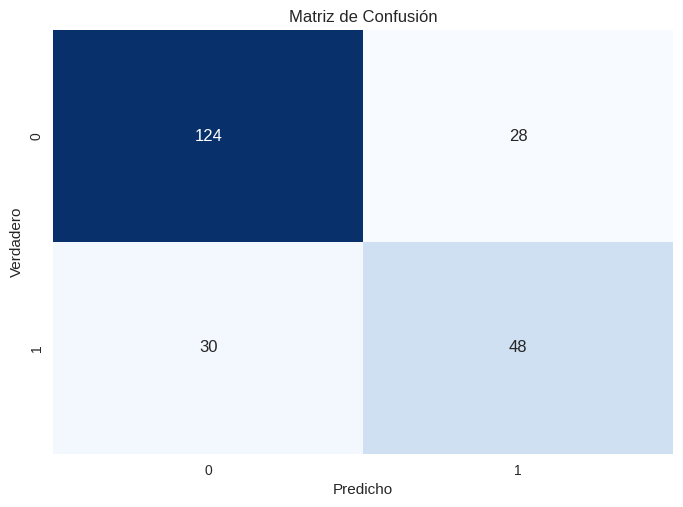

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
print(cm)

[[124  28]
 [ 30  48]]


In [ ]:
# Probabilidades de clasificación para las clases positivas (1)
y_proba = rf.predict_proba(X_test_processed)[:, 1]

# Calculamos la curva ROC
fp, vp, thresholds = roc_curve(y_test, y_proba)

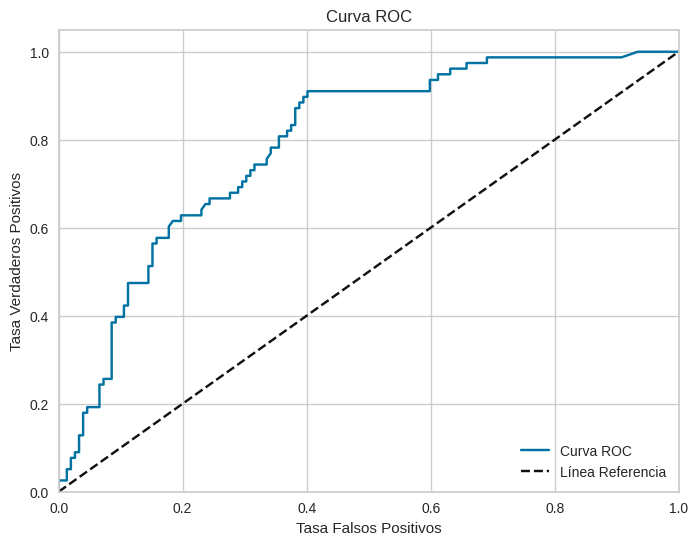

In [ ]:
# Visualización de curva ROC

plt.figure(figsize = (8, 6))
plt.plot(fp, vp, label = 'Curva ROC')
plt.plot([0,1], [0,1], 'k--', label='Línea Referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC SCORE RANDOM FOREST: {auc}')

ROC AUC SCORE RANDOM FOREST: 0.7913714574898786


**Conclusiones Intermedias RandomForestClassifier**:
- Podemos ver que el modelo tiene un recall para la clase 0 de un 82% y para la clase 1 (minoritaria) de un 62%, lo que indica que el 62% de los casos reales de la clase 1 se predijeron correctamente.
- El ROC score es de un 0.7914, esto indica que que este modelo tiene una capacidad razonable para distinguir entre clases.

Segun la matriz de confusión podemos entender lo siguiente:

- Existen 124 verdaderos negativos, correctamente clasificados
- Existen 28 falsos negativos, esto puede ser un problema ya que el algoritmo clasifica que el paciente no tiene diabetes cuando si lo tiene
- Existen 30 falsos positivos, esto indica que se clasificaron como pacientes diabeticos cuando no cuentan con la enfermedad
- Existen 48 verdaderos positivos, se predijo que cuentan con la enfermedad y efectivamente si cuentan con ella

##DecisionTreeClassifier

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=2,cv=10)
grid.fit(X_train_processed, y_train)

In [ ]:
best_params = grid.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 25}


In [ ]:
dc = DecisionTreeClassifier(**best_params)
dc.fit(X_train_processed,y_train)
y_pred = dc.predict(X_test_processed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       152
           1       0.53      0.50      0.51        78

    accuracy                           0.68       230
   macro avg       0.64      0.63      0.64       230
weighted avg       0.67      0.68      0.68       230



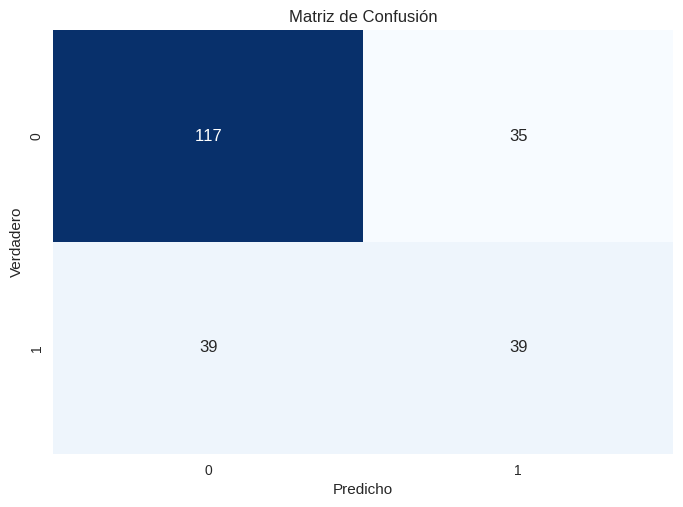

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
print(cm)

[[117  35]
 [ 39  39]]


In [ ]:
# Probabilidades de clasificación para las clases positivas (1)
y_proba = dc.predict_proba(X_test_processed)[:, 1]

# Calculamos la curva ROC
fp, vp, thresholds = roc_curve(y_test, y_proba)

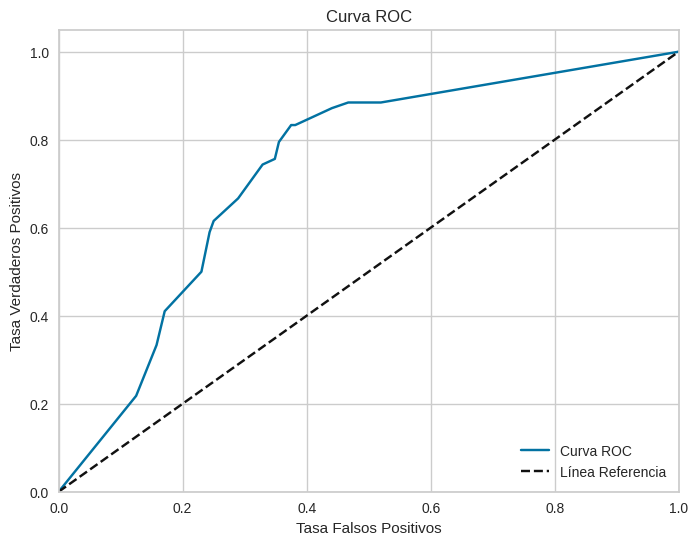

In [ ]:
# Visualización de curva ROC

plt.figure(figsize = (8, 6))
plt.plot(fp, vp, label = 'Curva ROC')
plt.plot([0,1], [0,1], 'k--', label='Línea Referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Área bajo la curva ROC (AUC)

auc= roc_auc_score(y_test, y_proba)
print("ROC AUC SCORE ARBOLES DE DECISIÓN ", auc)

ROC AUC SCORE ARBOLES DE DECISIÓN  0.7329622132253713


**Conclusiones Intermedias DecisionTreeClassifier**:
- Podemos ver que el modelo tiene un recall para la clase 0 de un 77% y para la clase 1 (minoritaria) de un 50%, lo que indica que el 50% de los casos reales de la clase 1 se predijeron correctamente.

- El ROC score es de un 0.7330, esto indica que que este modelo tiene una capacidad razonable para distinguir entre clases.

- Comparando este modelo v/s el modelo anterior, por el momento RandomForest tiene un mejor porcentaje de predecir la clase 1.

Segun la matriz de confusión podemos entender lo siguiente:

- Existen 117 verdaderos negativos, correctamente clasificados.
- Existen 35 falsos negativos, esto puede ser un problema ya que el algoritmo clasifica que el paciente no tiene diabetes cuando si lo tiene.
- Existen 39 falsos positivos, esto indica que se clasificaron como pacientes diabeticos cuando no cuentan con la enfermedad.
- Existen 39 verdaderos positivos, se predijo que cuentan con la enfermedad.

###LogisticRegression

In [ ]:
param_grid = {'C': [0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5, 0.8, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg','lbfgs','liblinear','sag']
              }

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

In [ ]:
best_params=grid.best_params_
print(best_params)

{'C': 0.3, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(**best_params)
lr.fit(X_train_processed,y_train)
y_pred = lr.predict(X_test_processed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       152
           1       0.71      0.63      0.67        78

    accuracy                           0.79       230
   macro avg       0.77      0.75      0.76       230
weighted avg       0.78      0.79      0.78       230



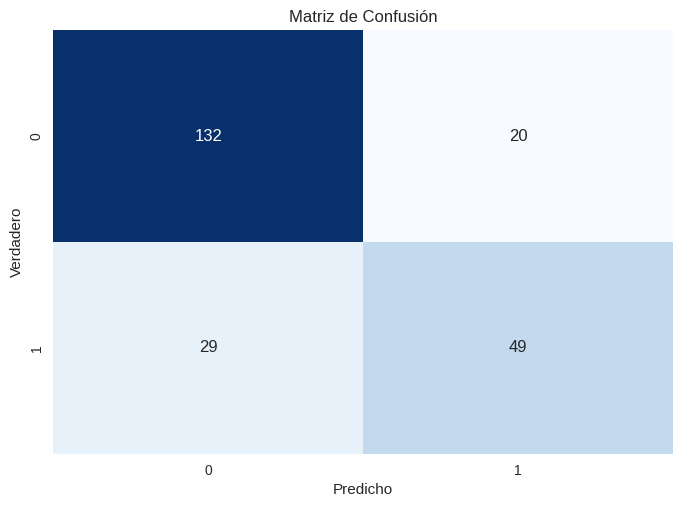

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
print(cm)

[[132  20]
 [ 29  49]]


In [ ]:
# Probabilidades de clasificación para las clases positivas (1)
y_proba = lr.predict_proba(X_test_processed)[:, 1]

# Calculamos la curva ROC
fp, vp, thresholds = roc_curve(y_test, y_proba)

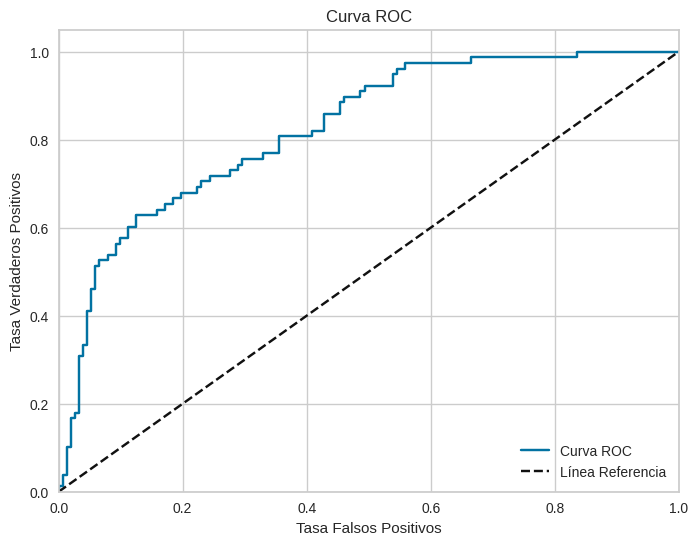

In [ ]:
# Visualización de curva ROC

plt.figure(figsize = (8, 6))
plt.plot(fp, vp, label = 'Curva ROC')
plt.plot([0,1], [0,1], 'k--', label='Línea Referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
auc= roc_auc_score(y_test, y_proba)
print("ROC AUC SCORE REGRESIÓN LOGÍSTICA ", auc)

ROC AUC SCORE REGRESIÓN LOGÍSTICA  0.8253205128205129


**Conclusiones Intermedias LogisticRegression**:
- Podemos ver que el modelo tiene un recall para la clase 0 de un 87% y para la clase 1 (minoritaria) de un 63%, lo que indica que el 63% de los casos reales de la clase 1 se predijeron correctamente.

- El ROC score es de un 0.8253, esto indica que que este modelo tiene una capacidad razonable para distinguir entre clases

Segun la matriz de confusión podemos entender lo siguiente:

- Existen 132 verdaderos negativos, correctamente clasificados
- Existen 29 falsos negativos, esto puede ser un problema ya que el algoritmo clasifica que el paciente no tiene diabetes cuando si lo tiene
- Existen 29 falsos positivos, esto indica que se clasificaron como pacientes diabeticos cuando no cuentan con la enfermedad
- Existen 49 verdaderos positivos, se predijo que cuentan con la enfermedad y lamentablemente si cuentan con ella

###KNN

In [ ]:
param_grid = {'n_neighbors':[3, 5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 250, 400, 500]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

In [ ]:
best_params=grid.best_params_
print(best_params)

{'n_neighbors': 25}


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train_processed,y_train)
y_pred = knn.predict(X_test_processed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       152
           1       0.65      0.50      0.57        78

    accuracy                           0.74       230
   macro avg       0.71      0.68      0.69       230
weighted avg       0.73      0.74      0.73       230



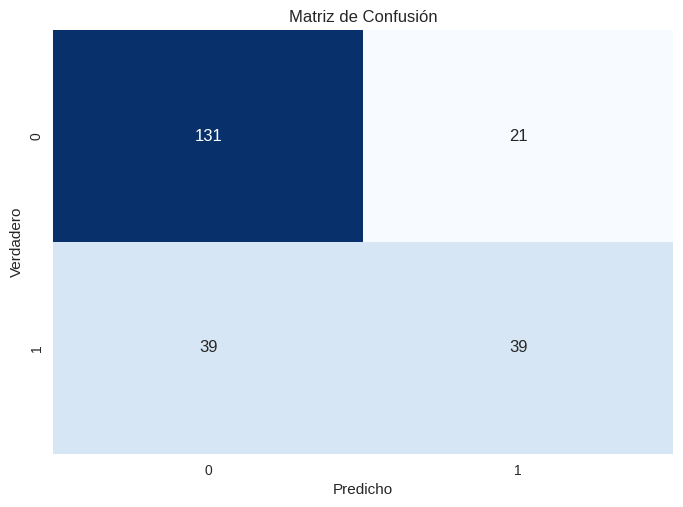

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
print(cm)

[[131  21]
 [ 39  39]]


In [ ]:
# Probabilidades de clasificación para las clases positivas (1)
y_proba = knn.predict_proba(X_test_processed)[:, 1]

# Calculamos la curva ROC
fp, vp, thresholds = roc_curve(y_test, y_proba)

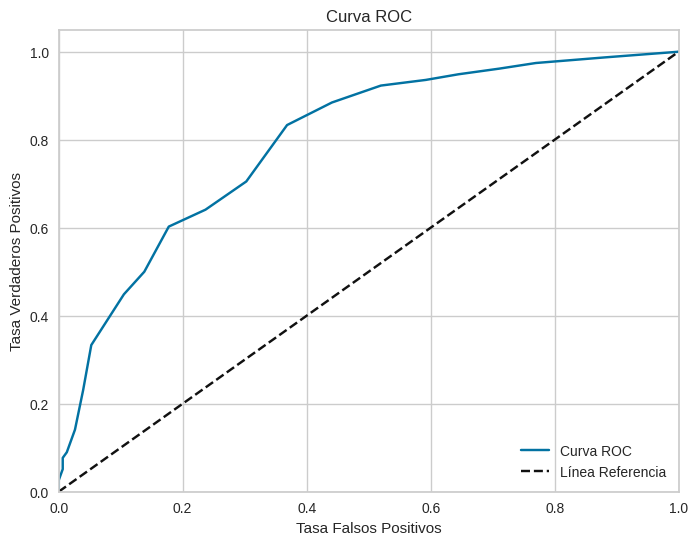

In [ ]:
# Visualización de curva ROC

plt.figure(figsize = (8, 6))
plt.plot(fp, vp, label = 'Curva ROC')
plt.plot([0,1], [0,1], 'k--', label='Línea Referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
auc= roc_auc_score(y_test, y_proba)
print("ROC AUC SCORE KNN ", auc)

ROC AUC SCORE KNN  0.7960104588394061


**Conclusiones Intermedias KNN**:
- Podemos ver que el modelo tiene un recall para la clase 0 de un 86% y para la clase 1 (minoritaria) de un 50%, lo que indica que el 50% de los casos reales de la clase 1 se predijeron correctamente.

- El ROC score es de un 0.796, esto indica que que este modelo tiene una capacidad razonable para distinguir entre clases

Segun la matriz de confusión podemos entender lo siguiente:

- Existen 132 verdaderos negativos, correctamente clasificados
- Existen 21 falsos negativos, esto puede ser un problema ya que el algoritmo clasifica que el paciente no tiene diabetes cuando si lo tiene
- Existen 39 falsos positivos, esto indica que se clasificaron como pacientes diabeticos cuando no cuentan con la enfermedad
- Existen 39 verdaderos positivos, se predijo que cuentan con la enfermedad y lamentablemente si cuentan con ella

## Conclusiones Generales
- Como vemos de los 4 modelos utilizados el que tuvo mejor rendimiento fue LogisticRegression seguido por RandomForest Classifier (63% y 62% respectivamente) ademas de que su ROC AUC SCORE es de un 0.8253 comparado al modelo de RandomForest el cual tiene un SCORE de 0.7914.
- Al ser un dataset desbalanceado en el cual no manejamos este desbalance pusimos enfasis en la medición de recall y curva ROC.
- Como vista general a los 4 modelos testeados, ninguno paso la prueba, ya que en caso de ser utilizado en la vida real todos los modelos tienen una tasa de predecir de forma erronea si el paciente tiene o no la enfermedad.
- Como mencionamos anteriormente una forma de corregir esto puede ser utilizando un tratamiento correcto a las clases como UnderSample o Oversample.